In [10]:
# redimensionarea si redenumirea pozelor doar intr-un fisier, pentru a forma folderul mare

import os
from PIL import Image

# Directorul care conține imaginile originale
input_dir = '../all_photos/'
# Directorul unde să salvezi imaginile redimensionate
output_dir = '../all_lanczos/'

# Creează directorul de ieșire dacă nu există
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Funcția de redimensionare și salvare a imaginilor
def resize_and_save_image(input_path, output_path, target_size=(256, 256)):
    with Image.open(input_path) as img:
        img_resized = img.resize(target_size, Image.LANCZOS)
        img_resized.save(output_path)

# Contor pentru redenumirea imaginilor
image_counter = 1

# Iterează prin toate fișierele și subfolderele din directorul de intrare
for root, dirs, files in os.walk(input_dir):
    for filename in files:
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            input_path = os.path.join(root, filename)
            # Generarea noului nume pentru imagine
            new_filename = f"image_{image_counter}.png"
            output_path = os.path.join(output_dir, new_filename)
            resize_and_save_image(input_path, output_path)
            image_counter += 1

print("Redimensionarea imaginilor a fost finalizată!")


C:\Users\Cezica\AppData\Local\Temp\ipykernel_27668\615518957.py:18: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_resized = img.resize(target_size, Image.LANCZOS)


Redimensionarea imaginilor a fost finalizată!


In [1]:
# incercare de salvare a imaginilor redimensionate

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

input_dir = 'flowers'
output_dir = 'resized_flowers'
os.makedirs(output_dir, exist_ok=True)

image_filenames = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith('.png')]

def resize_image(image):
    image = tf.convert_to_tensor(image, dtype=tf.float32) / 255.0
    image = tf.image.resize_with_crop_or_pad(image, 256, 256)
    return image

for i, image_filename in enumerate(image_filenames[:15000]):
    image = Image.open(image_filename)
    image_np = np.array(image)
    
    resized_image = resize_image(image_np)
    resized_image_np = (resized_image.numpy() * 255).astype(np.uint8)  # convert back to uint8
    
    # Salvarea imaginii redimensionate
    output_filename = os.path.join(output_dir, f'resized_image_{i}.png')
    Image.fromarray(resized_image_np).save(output_filename)

KeyboardInterrupt: 

In [3]:
# descarcarea imaginilor - originale

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# Încărcarea dataset-ului
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

train_dataset = dataset['train']
test_dataset = dataset['test']
validation_dataset = dataset['validation']

# Crearea directorului de output
output_dir = 'flowers'
os.makedirs(output_dir, exist_ok=True)

# Afișarea și salvarea imaginilor
for i, (image, label) in enumerate(test_dataset.take(15000)):
    # Convertirea imaginii la format uint8
    image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
    image_np = image.numpy()
    
    # Salvarea imaginii folosind PIL
    image_pil = Image.fromarray(image_np)
    image_filename = os.path.join(output_dir, f'img_{i}.png')
    image_pil.save(image_filename)


(500, 667, 3)
(256, 256, 3)


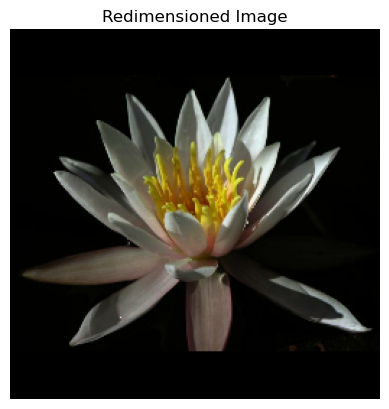

(256, 256, 3)


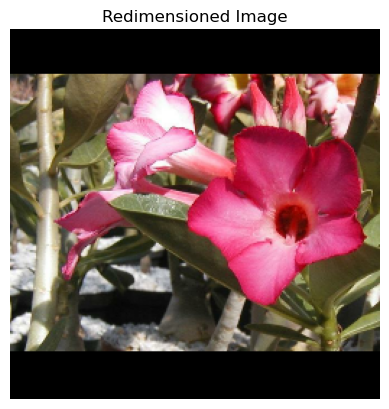

(256, 256, 3)


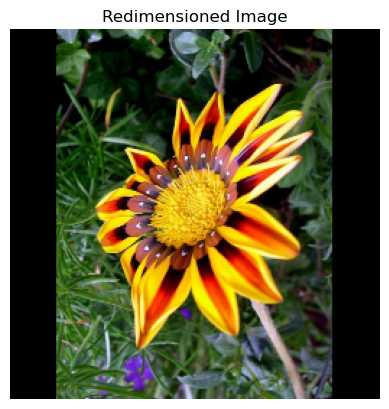

(256, 256, 3)


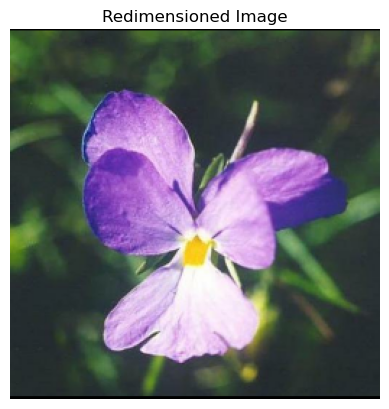

(256, 256, 3)


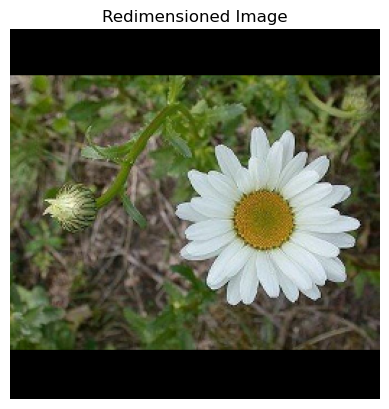

(256, 256, 3)


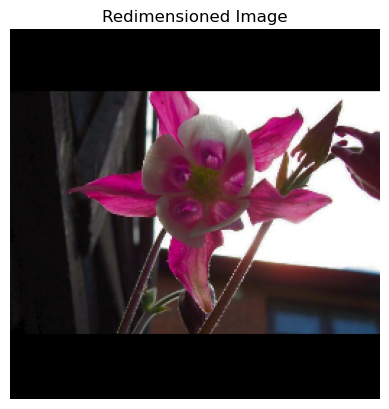

(256, 256, 3)


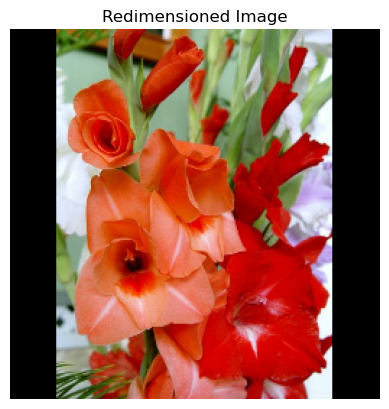

(256, 256, 3)


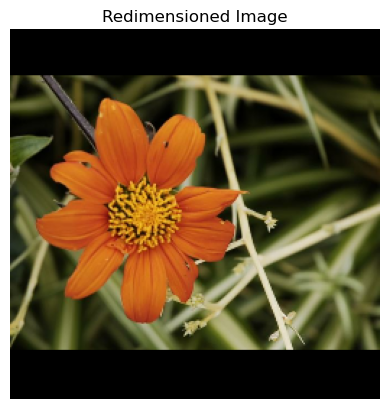

(256, 256, 3)


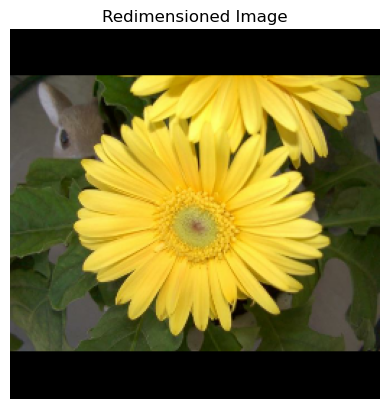

(256, 256, 3)


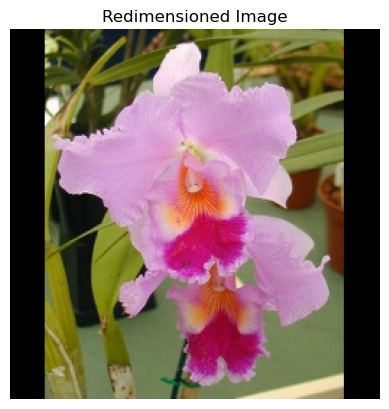

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

train_dataset = dataset['train']
test_dataset = dataset['test']
validation_dataset = dataset['validation']

for image, label in train_dataset.take(1):
    print(image.shape)

def resize_image(image, label):
    image = tf.image.resize_with_pad(image, 256, 256)
    return image, label

train_dataset = train_dataset.map(resize_image)
test_dataset = test_dataset.map(resize_image)
validation_dataset = validation_dataset.map(resize_image)

for image, label in train_dataset.take(10):
    print(image.shape)  # Ar trebui să fie (256, 256, 3)
    resized_image = image.numpy()
    plt.imshow(resized_image.astype('uint8'))
    plt.title('Redimensioned Image')
    plt.axis('off')
    plt.show()